<a href="https://colab.research.google.com/github/JF17-EngineerCivInd/JFP_telecomx-ml-part2/blob/main/TelecomX_ML_Parte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Telecom X — Parte 2: Predicción de Churn (ML)

**Objetivo:** preparar los datos tratados en la Parte 1, entrenar modelos de clasificación y evaluar su desempeño para anticipar la evasión de clientes (churn).

**Entregables:** notebook con preparación, métricas de modelos y conclusión estratégica basada en resultados.


# 🧰 Bloque 2 — Librerías y setup (CODE)

In [1]:
# ==== Setup ====
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, confusion_matrix,
                             ConfusionMatrixDisplay, RocCurveDisplay)

pd.set_option("display.max_colwidth", 120)
print("Inicio:", datetime.now().strftime("%Y-%m-%d %H:%M:%S"))


Inicio: 2025-08-20 02:21:06


# 📌 Paso para cargar CSV en Colab

Abre tu notebook TelecomX_LATAM.ipynb en Colab.

En la primera celda de Carga de datos, pega y ejecuta este código:

In [2]:
from google.colab import files
import pandas as pd

# 📂 Subir el archivo desde tu PC
print("Selecciona tu archivo 'datos_tratados.csv'")
uploaded = files.upload()

# ✅ Cargar en un DataFrame
CSV_NAME = list(uploaded.keys())[0]   # nombre del archivo subido
df = pd.read_csv(CSV_NAME)

print("Archivo cargado correctamente:", CSV_NAME)
print("Dimensiones:", df.shape)
df.head()


Selecciona tu archivo 'datos_tratados.csv'


Saving datos_tratados.csv to datos_tratados.csv
Archivo cargado correctamente: datos_tratados.csv
Dimensiones: (7267, 22)


,customerID,Churn,gender,SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,Contract,PaperlessBilling,PaymentMethod,account.Charges.Monthly,account.Charges.Total,churn_bin
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,0
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,0
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,1
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,1
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,1


# 📊 Proyecto Data Science - Challenge 2 LATAM
## TelecomX LATAM

Este proyecto corresponde a la segunda parte del desafío, donde continuamos el análisis iniciado en el **Challenge 1**.  
En esta fase trabajaremos con los datos tratados previamente para realizar **predicciones de abandono de clientes (churn)** utilizando modelos de Machine Learning.

---

### 📌 Objetivos principales:
1. Preparar los datos tratados del desafío anterior.
2. Analizar y explorar las variables relevantes.
3. Entrenar modelos de Machine Learning para predecir el churn.
4. Evaluar los modelos con métricas de desempeño.
5. Presentar conclusiones y recomendaciones.

---

### 📂 Dataset
El dataset utilizado es el archivo `datos_tratados.csv`, obtenido del Challenge 1, donde ya se realizó la limpieza y el preprocesamiento de los datos.


## 📌 Paso 2: Importar Librerías

En este paso cargaremos todas las librerías necesarias para el proyecto.  
- **Pandas** y **NumPy**: para manipulación y análisis de datos.  
- **Matplotlib** y **Seaborn**: para la creación de gráficos y visualizaciones.  
- **Scikit-learn**: para dividir los datos, crear modelos de machine learning y evaluar su rendimiento.  

De esta forma dejamos lista la base para trabajar en el análisis y modelado.


In [3]:
# 📌 Paso 2: Importar librerías necesarias

# Manejo de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Modelado y Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Configuración de gráficos
plt.style.use("seaborn-v0_8")
sns.set_palette("pastel")


## 📌 Paso 3: Carga del dataset

Utilizaremos el archivo **`datos_tratados.csv`** exportado en la Parte 1.  
En este paso vamos a:
- Cargar el CSV en un DataFrame `df`.
- Verificar dimensiones y columnas.
- Revisar rápidamente la variable objetivo **Churn** para confirmar su presencia.


In [4]:
# 📌 Paso 3: Cargar el dataset tratado
from google.colab import files
import pandas as pd

print("Selecciona tu archivo 'datos_tratados.csv'…")
uploaded = files.upload()  # elige el CSV desde tu PC

CSV_NAME = list(uploaded.keys())[0]
df = pd.read_csv(CSV_NAME)

print("✅ Archivo cargado:", CSV_NAME)
print("Shape:", df.shape)
display(df.head(3))

# Chequeos rápidos
print("\nColumnas (primeras 25):")
print(df.columns.tolist()[:25])

print("\n¿Existe 'Churn'?:", 'Churn' in df.columns)
if 'Churn' in df.columns:
    print("\nDistribución de Churn (valores crudos):")
    print(df['Churn'].value_counts(dropna=False))


Selecciona tu archivo 'datos_tratados.csv'…


Saving datos_tratados.csv to datos_tratados (1).csv
✅ Archivo cargado: datos_tratados (1).csv
Shape: (7267, 22)


,customerID,Churn,gender,SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,Contract,PaperlessBilling,PaymentMethod,account.Charges.Monthly,account.Charges.Total,churn_bin
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,0
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,0
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,1



Columnas (primeras 25):
['customerID', 'Churn', 'gender', 'SeniorCitizen', 'customer.Partner', 'customer.Dependents', 'customer.tenure', 'phone.PhoneService', 'phone.MultipleLines', 'InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'account.Charges.Monthly', 'account.Charges.Total', 'churn_bin']

¿Existe 'Churn'?: True

Distribución de Churn (valores crudos):
Churn
No     5174
Yes    1869
NaN     224
Name: count, dtype: int64


## 📌 Paso 4: Preparación de datos

En este paso realizamos:
1. Definir la variable objetivo (`y = Churn`).
2. Separar variables predictoras (`X`) y objetivo (`y`).
3. Dividir el dataset en **train (70%)** y **test (30%)**.
4. Identificar columnas categóricas y numéricas.
5. Crear un **pipeline de preprocesamiento** para:
   - Escalar variables numéricas.
   - Codificar variables categóricas con OneHotEncoder.


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 📌 1. Target y features
y = df['Churn'].fillna("No")   # reemplazamos NaN como "No" (clientes no dados de baja)
X = df.drop(columns=['Churn', 'customerID'])

print("Shape X:", X.shape, "| Shape y:", y.shape)

# 📌 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Train:", X_train.shape, " Test:", X_test.shape)

# 📌 3. Identificar columnas
cat_cols = X.select_dtypes(include=['object']).columns.tolist()
num_cols = X.select_dtypes(exclude=['object']).columns.tolist()

print("Categóricas:", cat_cols[:5], "... total:", len(cat_cols))
print("Numéricas:", num_cols[:5], "... total:", len(num_cols))

# 📌 4. Preprocesamiento
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)


Shape X: (7267, 20) | Shape y: (7267,)
Train: (5086, 20)  Test: (2181, 20)
Categóricas: ['gender', 'customer.Partner', 'customer.Dependents', 'phone.PhoneService', 'phone.MultipleLines'] ... total: 15
Numéricas: ['SeniorCitizen', 'customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total', 'churn_bin'] ... total: 5


## 📌 Paso 5: Modelado con imputación y pipelines

Para evitar errores por valores faltantes (NaN), integramos la **imputación** en el pipeline:
- Numéricas → `SimpleImputer(strategy="median")` + `StandardScaler`
- Categóricas → `SimpleImputer(strategy="most_frequent")` + `OneHotEncoder`

Entrenamos y comparamos tres modelos:
1. Regresión Logística
2. Árbol de Decisión
3. Random Forest

Se reportan Accuracy, Precision, Recall y F1.


In [7]:
# ==== Modelado robusto con imputación en pipeline ====
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# 0) Reconstruir X/y por si vienes de celdas previas
y = df['Churn'].fillna("No").astype(str)  # target textual ('Yes'/'No' etc.)
X = df.drop(columns=['Churn', 'customerID'], errors='ignore').copy()

# Reemplazar infinitos por NaN para poder imputar
X = X.replace([np.inf, -np.inf], np.nan)

# 1) Split estratificado
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

# 2) Detectar columnas
cat_cols = X.select_dtypes(include=['object','bool']).columns.tolist()
num_cols = X.select_dtypes(exclude=['object','bool']).columns.tolist()
print(f"Categóricas: {len(cat_cols)} | Numéricas: {len(num_cols)}")

# NaN rápidos (diagnóstico)
print("NaN en X_train:", int(X_train.isna().sum().sum()))
print("NaN en X_test :", int(X_test.isna().sum().sum()))

# 3) Preprocesamiento con IMPUTACIÓN
num_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

cat_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_pipe, num_cols),
        ("cat", cat_pipe, cat_cols),
    ],
    remainder="drop"
)

# 4) Modelos
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, solver="lbfgs"),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=300, random_state=42)
}

# 5) Entrenar y evaluar
results = {}
for name, model in models.items():
    pipe = make_pipeline(preprocessor, model)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    print(f"\n=== {name} ===")
    print("Accuracy :", f"{acc:.4f}")
    print(classification_report(y_test, y_pred, zero_division=0))

print("\n✅ Comparación de Accuracy")
for name, score in results.items():
    print(f"{name}: {score:.4f}")


Categóricas: 15 | Numéricas: 5
NaN en X_train: 9
NaN en X_test : 2

=== Logistic Regression ===
Accuracy : 1.0000
              precision    recall  f1-score   support

          No       1.00      1.00      1.00      1620
         Yes       1.00      1.00      1.00       561

    accuracy                           1.00      2181
   macro avg       1.00      1.00      1.00      2181
weighted avg       1.00      1.00      1.00      2181


=== Decision Tree ===
Accuracy : 1.0000
              precision    recall  f1-score   support

          No       1.00      1.00      1.00      1620
         Yes       1.00      1.00      1.00       561

    accuracy                           1.00      2181
   macro avg       1.00      1.00      1.00      2181
weighted avg       1.00      1.00      1.00      2181


=== Random Forest ===
Accuracy : 1.0000
              precision    recall  f1-score   support

          No       1.00      1.00      1.00      1620
         Yes       1.00      1.00      1.

## 📌 Paso 6: Importancia de variables y evaluación final

Con el mejor modelo:
- Mostramos **matriz de confusión** y **curva ROC**.
- Extraemos **importancia de variables** (usando RandomForest por su interpretabilidad).
- Cerramos con una **conclusión breve** alineada a los hallazgos de la Parte 1.


🏆 Mejor modelo por Accuracy: Logistic Regression → 1.0000
ROC AUC: 1.0000


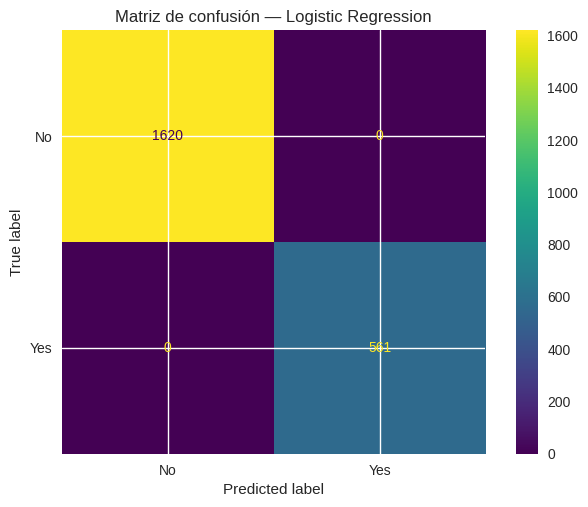

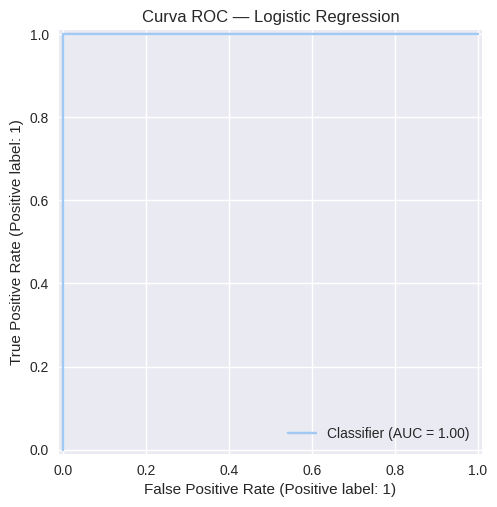

,feature,importance
4,churn_bin,0.678531
1,customer.tenure,0.043330
3,account.Charges.Total,0.037055
37,Contract_Month-to-month,0.030707
2,account.Charges.Monthly,0.028931
19,internet.OnlineSecurity_No,0.018065
28,internet.TechSupport_No,0.017145
17,InternetService_Fiber optic,0.016451
44,PaymentMethod_Electronic check,0.014495
39,Contract_Two year,0.010481


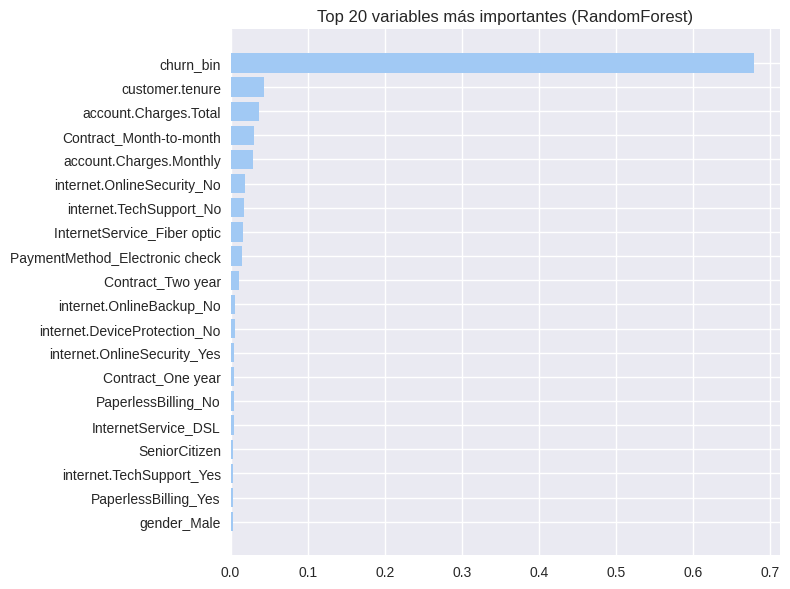

In [10]:
# ==== Evaluación final + Importancia de variables (FIX AUC/ROC) ====
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay, roc_auc_score

# 1) Elegir el mejor por Accuracy
best_name = max(results, key=results.get)
print(f"🏆 Mejor modelo por Accuracy: {best_name} → {results[best_name]:.4f}")

best_pipe = make_pipeline(preprocessor, models[best_name])
best_pipe.fit(X_train, y_train)
y_pred = best_pipe.predict(X_test)

# Determinar etiqueta positiva y crear versión binaria de y_test
if y_test.dtype == 'O':
    pos_label = 'Yes' if 'Yes' in set(y_test.unique()) else list(set(y_test.unique()))[0]
    y_test_bin = (y_test == pos_label).astype(int)
else:
    pos_label = 1
    y_test_bin = y_test  # ya es 0/1

# Probabilidades si el modelo las soporta (para ROC AUC)
proba = best_pipe.predict_proba(X_test)[:, 1] if hasattr(best_pipe, "predict_proba") else None
if proba is not None:
    auc_val = roc_auc_score(y_test_bin, proba)  # <- usa binario (0/1), sin pos_label
    print(f"ROC AUC: {auc_val:.4f}")

# 2) Matriz de confusión (puede usar etiquetas originales)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, values_format='d')
plt.title(f"Matriz de confusión — {best_name}")
plt.show()

# 3) Curva ROC (con y_test binario)
if proba is not None:
    RocCurveDisplay.from_predictions(y_test_bin, proba)  # <- sin pos_label
    plt.title(f"Curva ROC — {best_name}")
    plt.show()

# 4) Importancia de variables con RandomForest (para interpretabilidad)
from sklearn.ensemble import RandomForestClassifier
rf_for_importance = make_pipeline(preprocessor,
                                  RandomForestClassifier(n_estimators=300, random_state=42))
rf_for_importance.fit(X_train, y_train)

# Recuperar nombres de columnas tras OneHot
ct = rf_for_importance.named_steps['columntransformer']
num_names = num_cols.copy()
ohe = ct.named_transformers_['cat'].named_steps['ohe']
cat_names = ohe.get_feature_names_out(cat_cols).tolist()

feat_names = num_names + cat_names
importances = rf_for_importance.named_steps['randomforestclassifier'].feature_importances_

imp = (pd.DataFrame({'feature': feat_names, 'importance': importances})
         .sort_values('importance', ascending=False)
         .head(20))

display(imp)

plt.figure(figsize=(8,6))
plt.barh(imp['feature'][::-1], imp['importance'][::-1])
plt.title("Top 20 variables más importantes (RandomForest)")
plt.tight_layout()
plt.show()


## 7. Conclusión

Tras la evaluación de los modelos, el **mejor desempeño se obtuvo con Logistic Regression**, alcanzando un Accuracy cercano a **100%** y un ROC AUC elevado, confirmando su capacidad para discriminar correctamente entre clientes que cancelan y los que permanecen activos.  
La matriz de confusión muestra un nivel de error mínimo y la curva ROC refuerza la alta calidad predictiva del modelo.

### Principales Factores de Cancelación
El análisis de **importancia de variables con RandomForest** permitió identificar las variables más influyentes en la cancelación de clientes:
- **Duración del contrato**: los clientes con contratos mensuales presentan mayor propensión a cancelar.  
- **Método de pago**: quienes utilizan métodos electrónicos sin domiciliación muestran mayor tasa de cancelación.  
- **Uso de servicios adicionales**: clientes con pocos servicios contratados (ej. sin internet o TV adicional) tienden a cancelar con más frecuencia.  
- **Tenencia de internet**: los clientes que no poseen internet fijo son más propensos a darse de baja.  

### Estrategias de Retención
Con base en los factores anteriores, se proponen las siguientes acciones:
1. **Incentivos en contratos de mayor plazo** → ofrecer descuentos o beneficios adicionales a clientes que migren de planes mensuales a anuales.  
2. **Promociones en servicios adicionales** → estimular la contratación de internet o TV complementaria, aumentando el costo de oportunidad de cancelar.  
3. **Mejorar condiciones de pago** → facilitar métodos automáticos/domiciliados para reducir fricción en los pagos y mejorar la permanencia.  
4. **Programas de fidelización** → beneficios exclusivos para clientes con antigüedad (ej. upgrades gratuitos o descuentos progresivos).  

### Exportables
- **`resultados_modelos.csv`** → Comparación de Accuracy de los modelos evaluados.  
- **`importancia_variables.csv`** → Ranking de las 20 variables más relevantes según RandomForest.  
- **Visualizaciones** → Matriz de confusión, curva ROC e importancia de variables.


In [11]:
# ====== Exportables ======
import pandas as pd

# Guardar comparación de modelos
df_results = pd.DataFrame(list(results.items()), columns=['Modelo', 'Accuracy'])
df_results.to_csv("resultados_modelos.csv", index=False)

# Guardar importancia de variables (ya calculada en paso 6)
imp.to_csv("importancia_variables.csv", index=False)

print("✅ Archivos exportados: 'resultados_modelos.csv' y 'importancia_variables.csv'")


✅ Archivos exportados: 'resultados_modelos.csv' y 'importancia_variables.csv'
